# TITANIC SURVIVOR PREDICTION

In this project, machine learning algorithms were used to create a model that predicts which passengers survived the Titanic shipwreck. The following algorithms were applied, and the results were plotted on a ROC curve:

1. **Logistic Regression** (`LogisticRegression`)
2. **Random Forest Classifier** (`RandomForestClassifier`)
3. **Perceptron** (`Perceptron`)
4. **SGD Classifier** (`SGDClassifier`)
5. **Decision Tree Classifier** (`DecisionTreeClassifier`)
6. **K-Nearest Neighbors (KNN) Classifier** (`KNeighborsClassifier`)
7. **Support Vector Classifier (SVC)** (`SVC`)
8. **Linear SVC** (`LinearSVC`)
9. **Naive Bayes (GaussianNB)** (`GaussianNB`)

The model was developed using these algorithms, and the performance was evaluated by plotting the results on a ROC curve.

In [1]:
#Importing the Libraries
# linear algebra
import numpy as np

# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Input Data
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [ ]:
#Data Exploration
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Feature Explanation
#survival:    Survival
#PassengerId: Unique Id of a passenger.
#pclass:    Ticket class
#sex:    Sex
#Age:    Age in years
#sibsp:    # of siblings / spouses aboard the Titanic
#parch:    # of parents / children aboard the Titanic
#ticket:    Ticket number
#fare:    Passenger fare
#cabin:    Cabin number
#embarked:    Port of Embarkationtrain_df.describe()

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [ ]:
#Percentage Missing Data
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [ ]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
#From 11 feature above, we need to know what features that could contribute to a high survival rate
#Every feature is possible except  ‘PassengerId’, ‘Ticket’ and ‘Name’ would be correlated with a high survival rate

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


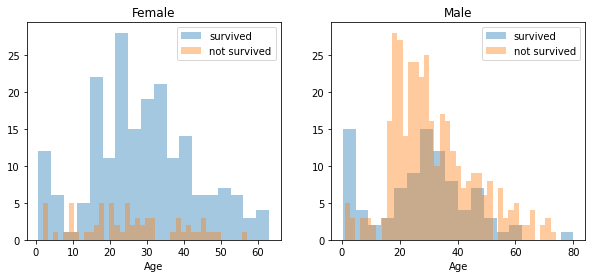

In [ ]:
#Plot Age & Sex vs surival rate
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [ ]:
#Men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.
#Since there seem to be certain ages, which have increased odds of survival and because I want every feature to be roughly on the same scale, I will create age groups later on.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


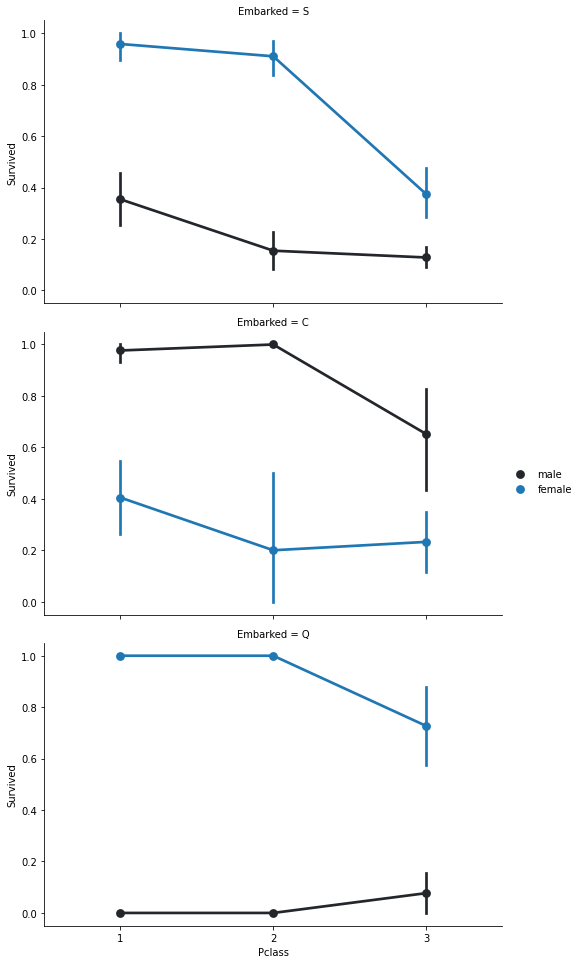

In [ ]:
#Plot Embarked, Pclass and Sex vs survival rate
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [ ]:
#Embarked seems to be correlated with survival, depending on the gender.
#Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.
#Pclass also seems to be correlated with survival. We will generate another plot of it below.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

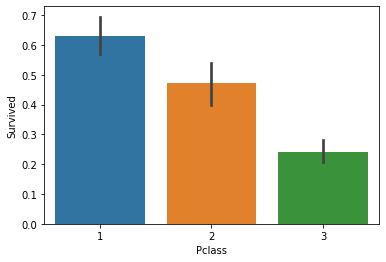

In [ ]:
# Pclass vs survival rate
sns.barplot(x='Pclass', y='Survived', data=train_df)

In [ ]:
#Pclass is contributing to a persons chance of survival, especially if this person is in class 1.
#I will create another pclass plot below.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


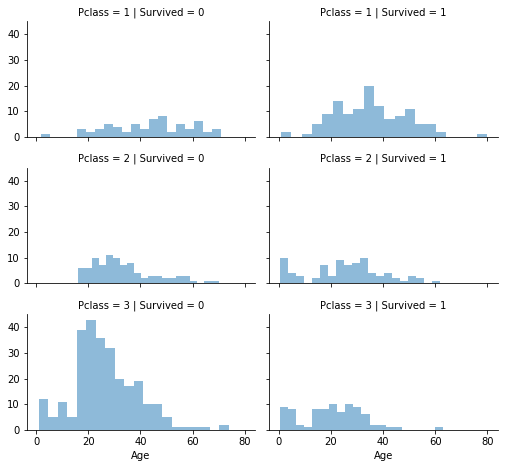

In [ ]:
#other pclass plot
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [ ]:
# plot above confirms our assumption about pclass 1, but we can also spot a high probability that a person in pclass 3 will not survive.

In [ ]:
# SibSp and Parch vs survival rate
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


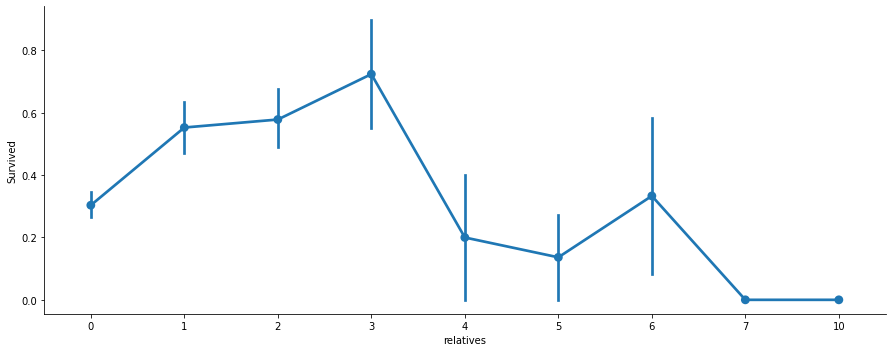

In [ ]:
axes = sns.factorplot('relatives','Survived',
                      data=train_df, aspect = 2.5, )

In [ ]:
#high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

In [ ]:
#Data Preprocessing
#drop ‘PassengerId’ from the train set, because it does not contribute to a persons survival probability.
#I will not drop it from the test set, since it is required there for the submission.
train_df = train_df.drop(['PassengerId'], axis=1)

In [ ]:
#Missing Data for Cabin (687 data)
#Extract deck information from cabin feature and create a new feature
#The missing values will be converted to zero
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x:re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

#We can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [ ]:
#Missing Data for Cabin (177 data)
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
# compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
# fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

train_df["Age"].isnull().sum()

0

In [ ]:
#Embarked feature has only 2 missing values, just fill these with the most common one.
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [ ]:
#Converting Features:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int64  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int64  
 12  Deck       891 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


In [ ]:
#Above you can see that ‘Fare’ is a float and we have to deal with 4 categorical features: Name, Sex, Ticket and Embarked.
#Lets investigate and transfrom one after another.

In [ ]:
#Converting “Fare” from float to int64, using the “astype()” function
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
#Use the Name feature to extract the Titles from the Name, so that we can build a new feature out of tha
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
# extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
# replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
# convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
# filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [ ]:
#Convert ‘Sex’ feature into numeric
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [ ]:
#Ticket attribute
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [ ]:
#Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So it will be dropped it from the dataset
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [ ]:
#Convert ‘Embarked’ feature into numeric.
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [ ]:
#Creating Categories
#Convert the ‘age’ feature. Convert it from float into integer. Then create the new ‘AgeGroup” variable, by categorizing every age into a group
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed
train_df['Age'].value_counts()

4    161
6    159
5    151
3    139
2    111
1    102
0     68
Name: Age, dtype: int64

In [ ]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,8,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,8,1
5,0,3,0,2,0,0,8,2,0,1,8,1
6,0,1,0,6,0,0,51,0,0,1,5,1
7,0,3,0,0,3,1,21,0,4,0,8,4
8,1,3,1,3,0,2,11,0,2,0,8,3
9,1,2,1,1,1,0,30,1,1,0,8,3


In [ ]:
#Creating Categories
#For "Fare" use sklearn “qcut()” function so the values would not fall into the first category when it cut the range of the fare values into a few equally big categories
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
#Creating new Features
#1. Age times Class
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [ ]:
#2. Fare per Person
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)# Let's take a last look at the training set, before we start training the models.
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,2,0,0,1,2,0,1,8,1,6,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


In [ ]:
#Building Machine Learning Model
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [ ]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.9304152637485971

In [ ]:
#Confusion Matrix for Random Forest for Training Data
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[486,  63],
       [105, 237]])

In [ ]:
# Compute accuracy Random Forest on the Training dataset
# assume y_true and y_pred are your true and predicted labels respectively
cm = confusion_matrix(Y_train, predictions)

# calculate accuracy from confusion matrix
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])

print("Accuracy:", accuracy)

Accuracy: 0.8114478114478114


In [ ]:
#K-Fold Cross Validation for Random Forest
from sklearn.model_selection import cross_val_score

# create Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100)

# perform 5-fold cross validation
scores = cross_val_score(random_forest, X_train, Y_train, cv=5)

# print the accuracy score for each fold
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {round(score * 100, 2)}%")

# calculate the mean accuracy score and standard deviation across all folds
mean_score = round(scores.mean() * 100, 2)
std_dev = round(scores.std() * 100, 2)

# print the mean and standard deviation scores
print(f"\nMean Accuracy Score: {mean_score}%")
print(f"Standard Deviation: {std_dev}%")

Fold 1: 79.89%
Fold 2: 80.34%
Fold 3: 86.52%
Fold 4: 79.78%
Fold 5: 84.27%

Mean Accuracy Score: 82.16%
Standard Deviation: 2.74%


In [ ]:
#Confusion Matrix for Random Forest for Testing Data
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_test, Y_prediction, cv=3)
confusion_matrix(Y_prediction, predictions)

array([[251,  21],
       [ 23, 123]])

In [ ]:
# Compute accuracy Random Forest on the test set
# assume y_true and y_pred are your true and predicted labels respectively
cm = confusion_matrix(Y_prediction, predictions)

# calculate accuracy from confusion matrix
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])

print("Accuracy:", accuracy)

Accuracy: 0.8947368421052632


In [ ]:
#Decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)


In [ ]:
#Confusion Matrix for Decision Tree for Training Data
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(decision_tree, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[482,  67],
       [115, 227]])

In [ ]:
# Compute accuracy Decision Tree on the Training dataset
# assume y_true and y_pred are your true and predicted labels respectively
cm = confusion_matrix(Y_train, predictions)

# calculate accuracy from confusion matrix
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])

print("Accuracy:", accuracy)

Accuracy: 0.7957351290684624


In [ ]:
#K-Fold Cross Validation for Decision Tree
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# create decision tree classifier
decision_tree = DecisionTreeClassifier()

# define number of folds
num_folds = 5

# create a KFold object with 5 splits
kfold = KFold(n_splits=num_folds, shuffle=True)

# create empty list to store accuracies
acc_decision_tree = []

# iterate over the 5 folds
for train_idx, val_idx in kfold.split(X_train):

    # split data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    Y_train_fold, Y_val_fold = Y_train.iloc[train_idx], Y_train.iloc[val_idx]

    # fit decision tree on the training set
    decision_tree.fit(X_train_fold, Y_train_fold)

    # evaluate decision tree on the validation set
    acc = round(decision_tree.score(X_val_fold, Y_val_fold) * 100, 2)

    # add accuracy to the list
    acc_decision_tree.append(acc)

# calculate mean and standard deviation of the accuracies
mean_acc_decision_tree = np.mean(acc_decision_tree)
std_acc_decision_tree = np.std(acc_decision_tree)

print("Accuracy of each fold: ", acc_decision_tree,)
print("Mean accuracy: ", mean_acc_decision_tree)
print("Standard deviation: ", std_acc_decision_tree)

Accuracy of each fold:  [79.89, 84.27, 80.34, 81.46, 78.09]
Mean accuracy:  80.80999999999999
Standard deviation:  2.042537637352122


In [ ]:
#Confusion Matrix for Decision Tree for Testing Data
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(decision_tree, X_test, Y_prediction, cv=3)
confusion_matrix(Y_prediction, predictions)

array([[248,  24],
       [ 26, 120]])

In [ ]:
# Compute accuracy Decision Tree on the test set
# assume y_true and y_pred are your true and predicted labels respectively
cm = confusion_matrix(Y_prediction, predictions)

# calculate accuracy from confusion matrix
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])

print("Accuracy:", accuracy)

Accuracy: 0.8803827751196173


In [ ]:
#Feature Importance Random Forest
#The more features you have, the more likely the model will suffer from overfitting and vice versa
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

importancesRF = pd.DataFrame({'feature':X_train.columns,'importanceRF':np.round(random_forest.feature_importances_,3)})
importancesRF = importancesRF.sort_values('importanceRF',ascending=False).set_index('feature')
importancesRF.head(15)

,importanceRF
feature,
Title,0.190
Sex,0.186
Age_Class,0.099
Deck,0.082
Pclass,0.077
Age,0.074
Fare,0.064
relatives,0.057
Embarked,0.053


<AxesSubplot:xlabel='feature'>

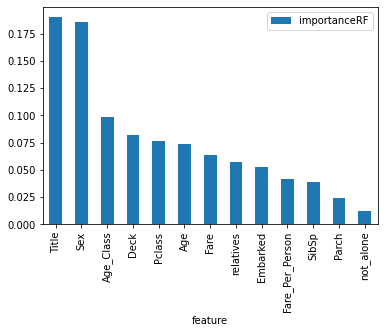

In [ ]:
importancesRF.plot.bar()

In [ ]:
trainRF_df  = train_df.drop("not_alone", axis=1)
testRF_df  = test_df.drop("not_alone", axis=1)

trainRF_df  = train_df.drop("Parch", axis=1)
testRF_df  = test_df.drop("Parch", axis=1)

In [ ]:
#Building Machine Learning Model for Random Forest
X_trainRF = trainRF_df.drop("Survived", axis=1)
Y_trainRF = trainRF_df["Survived"]
X_testRF  = testRF_df.drop("PassengerId", axis=1).copy()

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_trainRF, Y_trainRF)
Y_prediction = random_forest.predict(X_testRF)

random_forest.score(X_trainRF, Y_trainRF)

acc_random_forest = round(random_forest.score(X_trainRF, Y_trainRF) * 100, 2)
print(round(acc_random_forest,2,), "%")

93.04 %


In [ ]:
#K-Fold Cross Validation for Random Forest
from sklearn.model_selection import cross_val_score

# create Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100)

# perform 5-fold cross validation
scores = cross_val_score(random_forest, X_trainRF, Y_trainRF, cv=5)

# print the accuracy score for each fold
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {round(score * 100, 2)}%")

# calculate the mean accuracy score and standard deviation across all folds
mean_score = round(scores.mean() * 100, 2)
std_dev = round(scores.std() * 100, 2)

# print the mean and standard deviation scores
print(f"\nMean Accuracy Score: {mean_score}%")
print(f"Standard Deviation: {std_dev}%")

Fold 1: 79.33%
Fold 2: 80.9%
Fold 3: 84.27%
Fold 4: 81.46%
Fold 5: 83.71%

Mean Accuracy Score: 81.93%
Standard Deviation: 1.83%


In [ ]:
#Feature Importance Decision Tree
#The more features you have, the more likely the model will suffer from overfitting and vice versa
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

importancesDT = pd.DataFrame({'feature':X_train.columns,'importanceDT':np.round(decision_tree.feature_importances_,3)})
importancesDT = importancesDT.sort_values('importanceDT',ascending=False).set_index('feature')
importancesDT.head(15)


,importanceDT
feature,
Title,0.438
relatives,0.115
Deck,0.094
Pclass,0.062
Age,0.059
Fare,0.059
Age_Class,0.054
Embarked,0.037
Fare_Per_Person,0.037


<AxesSubplot:xlabel='feature'>

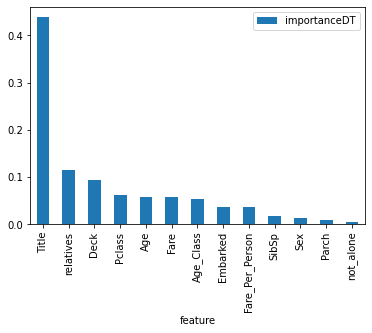

In [ ]:
importancesDT.plot.bar()

In [ ]:
trainDT_df  = train_df.drop("not_alone", axis=1)
testDT_df  = test_df.drop("not_alone", axis=1)

trainDT_df  = train_df.drop("Sex", axis=1)
testDT_df  = test_df.drop("Sex", axis=1)

In [ ]:
#Building Machine Learning Model for Decision Tree
X_trainDT = trainDT_df.drop("Survived", axis=1)
Y_trainDT = trainDT_df["Survived"]
X_testDT  = testDT_df.drop("PassengerId", axis=1).copy()

In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_trainDT, Y_trainDT)
Y_prediction = dt.predict(X_testDT)

dt.score(X_trainDT, Y_trainDT)

acc_dt = round(dt.score(X_trainDT, Y_trainDT) * 100, 2)
print(round(acc_dt,2,), "%")



93.04 %


In [ ]:
#K-Fold Cross Validation for Decision Tree
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# create decision tree classifier
decision_tree = DecisionTreeClassifier()

# define number of folds
num_folds = 5

# create a KFold object with 5 splits
kfold = KFold(n_splits=num_folds, shuffle=True)

# create empty list to store accuracies
acc_decision_tree = []

# iterate over the 5 folds
for train_idx, val_idx in kfold.split(X_trainDT):

    # split data into training and validation sets for this fold
    X_trainDT_fold, X_val_fold = X_trainDT.iloc[train_idx], X_trainDT.iloc[val_idx]
    Y_trainDT_fold, Y_val_fold = Y_trainDT.iloc[train_idx], Y_trainDT.iloc[val_idx]

    # fit decision tree on the training set
    decision_tree.fit(X_trainDT_fold, Y_trainDT_fold)

    # evaluate decision tree on the validation set
    acc = round(decision_tree.score(X_val_fold, Y_val_fold) * 100, 2)

    # add accuracy to the list
    acc_decision_tree.append(acc)

# calculate mean and standard deviation of the accuracies
mean_acc_decision_tree = np.mean(acc_decision_tree)
std_acc_decision_tree = np.std(acc_decision_tree)

print("Accuracy of each fold: ", acc_decision_tree,)
print("Mean accuracy: ", mean_acc_decision_tree)
print("Standard deviation: ", std_acc_decision_tree)

Accuracy of each fold:  [82.12, 85.96, 75.84, 78.65, 78.09]
Mean accuracy:  80.13199999999999
Standard deviation:  3.5413296937732266


In [ ]:
#Here we see the accuracy result after removing several feature is still good as it did before
#A general rule is that, the more features you have, the more likely your model will suffer from overfitting and vice versa
#But I think our data looks fine for now and hasn't too much features. So I use the feature before it has dropped

In [ ]:
pip install scikit-optimize


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Hyperparameter Tuning for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter search space
param_dist = {
    'n_estimators': range(100, 2000, 100),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None] + list(range(5, 31, 5)),
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1, 21),
    'bootstrap': [True, False]
}

# Create a random forest classifier
rf = RandomForestClassifier()

# Perform randomized search to get the best hyperparameters for the given search space
clf = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, n_jobs=-1)

clf.fit(X_train, Y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters:", clf.best_params_)
print("Accuracy:", clf.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best hyperparameters: {'n_estimators': 400, 'min_samples_split': 13, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 15, 'bootstrap': False}
Accuracy: 0.8462368966166594


In [ ]:
#Test New Parameter on Random Forest
# Set the new hyperparameters
new_hyperparameters = {
    'n_estimators': 400,
    'max_features': 'auto',
    'max_depth': 15,
    'min_samples_split': 13,
    'min_samples_leaf': 4,
    'bootstrap': False
}

# Create a Random Forest classifier with the new hyperparameters
random_forest = RandomForestClassifier(**new_hyperparameters, random_state=1, n_jobs=-1)

# Fit the classifier on the training set
random_forest.fit(X_train, Y_train)

# Predict on the test set
Y_prediction = random_forest.predict(X_test)



/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
#Confusion Matrix for Random Forest for Training Data with New Hyperparameter
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

array([[488,  61],
       [ 88, 254]])

In [ ]:
# Compute accuracy Random Forest on the training set with New Hyperparameter

cm = confusion_matrix(Y_train, predictions)

# calculate accuracy from confusion matrix
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])

print("Accuracy:", accuracy)

Accuracy: 0.8327721661054994


In [ ]:
#K-Fold Cross Validation for Random Forest
from sklearn.model_selection import cross_val_score


# perform 5-fold cross validation
scores = cross_val_score(random_forest, X_train, Y_train, cv=5)

# print the accuracy score for each fold
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {round(score * 100, 2)}%")

# calculate the mean accuracy score and standard deviation across all folds
mean_score = round(scores.mean() * 100, 2)
std_dev = round(scores.std() * 100, 2)

# print the mean and standard deviation scores
print(f"\nMean Accuracy Score: {mean_score}%")
print(f"Standard Deviation: {std_dev}%")

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

Fold 1: 84.92%
Fold 2: 81.46%
Fold 3: 85.39%
Fold 4: 82.02%
Fold 5: 85.39%

Mean Accuracy Score: 83.84%
Standard Deviation: 1.73%


In [ ]:
#Precision Recall for Random forest
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8063492063492064
Recall: 0.7426900584795322


In [ ]:
#Fscore for Random Forest
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7732115677321156

In [ ]:
#Confusion Matrix for Random Forest for Testing Data with New Hyperparameter
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_test, Y_prediction, cv=3)
confusion_matrix(Y_prediction, predictions)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

array([[263,  11],
       [ 17, 127]])

In [ ]:
# Compute accuracy Random Forest on testing data with New Hyperparameter
cm = confusion_matrix(Y_prediction, predictions)

# calculate accuracy from confusion matrix
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])

print("Accuracy:", accuracy)

Accuracy: 0.9330143540669856


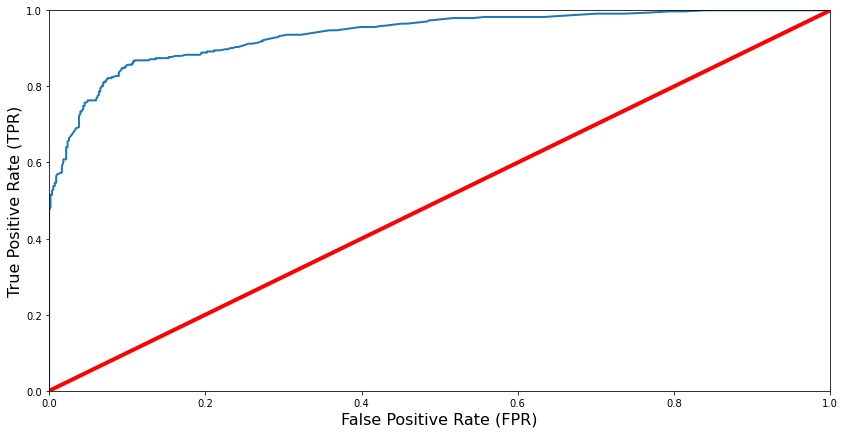

In [ ]:
#ROCplot for Random Forest
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
y_scoresRF = random_forest.predict_proba(X_train)
y_scoresRF = y_scoresRF[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scoresRF)# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [ ]:
#ROC for Random Forest
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scoresRF)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9375419422874124


In [ ]:
#Make a dataframe for the output
Y_prediction=random_forest.predict(X_test)
prediction=pd.DataFrame(np.c_[test_df['PassengerId'],Y_prediction],columns=["PassengerId","Survived"])
prediction

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
#Save the output to csv
prediction.to_csv("Survived_pridiction__random forest.csv", index=False)

In [ ]:
#Hyperparameter Tuning for Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter search space
param_dist = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [None] + list(range(1, 11)),
    "min_samples_split": randint(2, 21),
    "min_samples_leaf": randint(1, 21),
    "max_features": ["sqrt", "log2", None]
}

# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=1)

# Perform randomized search to get the best hyperparameters for the given search space
clf = RandomizedSearchCV(
    dt,
    param_distributions=param_dist,
    cv=5,
    n_iter=50,
    n_jobs=-1,
    random_state=1
)
clf.fit(X_train, Y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters:", clf.best_params_)
print("Accuracy:", clf.best_score_)


Best hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 6, 'splitter': 'best'}
Accuracy: 0.830500282468144


In [ ]:
#Test new param on Decision Tree
decision_tree = DecisionTreeClassifier(criterion="entropy",
                                splitter="best",
                                max_depth=3,
                                min_samples_split=6,
                                min_samples_leaf=5,
                                max_features=None,
                                random_state=1)

# Fit the decision tree classifier with the new hyperparameters
decision_tree.fit(X_train, Y_train)

# Predict on the test set
Y_prediction = decision_tree.predict(X_test)




In [ ]:
#Confusion Matrix for Decision Tree for Training Data with New Hyperparameter
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(decision_tree, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[486,  63],
       [101, 241]])

In [ ]:
# Compute accuracy Decision Tree on the training set with New Hyperparameter
cm = confusion_matrix(Y_train, predictions)

# calculate accuracy from confusion matrix
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])

print("Accuracy:", accuracy)

Accuracy: 0.8159371492704826


In [ ]:
#K-fold Cross Validation after Hyperparameter tuning
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# create decision tree classifier
decision_tree = DecisionTreeClassifier()

# define number of folds
num_folds = 5

# create a KFold object with 5 splits
kfold = KFold(n_splits=num_folds, shuffle=True)

# create empty list to store accuracies
acc_decision_tree = []

# iterate over the 5 folds
for train_idx, val_idx in kfold.split(X_trainDT):

    # split data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    Y_train_fold, Y_val_fold = Y_train.iloc[train_idx], Y_train.iloc[val_idx]

    # fit decision tree on the training set
    decision_tree.fit(X_train_fold, Y_train_fold)

    # evaluate decision tree on the validation set
    acc = round(decision_tree.score(X_val_fold, Y_val_fold) * 100, 2)

    # add accuracy to the list
    acc_decision_tree.append(acc)

# calculate mean and standard deviation of the accuracies
mean_acc_decision_tree = np.mean(acc_decision_tree)
std_acc_decision_tree = np.std(acc_decision_tree)

print("Accuracy of each fold: ", acc_decision_tree,)
print("Mean accuracy: ", mean_acc_decision_tree)
print("Standard deviation: ", std_acc_decision_tree)

Accuracy of each fold:  [80.45, 81.46, 76.4, 74.72, 83.15]
Mean accuracy:  79.23599999999999
Standard deviation:  3.1678547946520528


In [ ]:
#Precision Recall for Decision Tree
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.7927631578947368
Recall: 0.7046783625730995


In [ ]:
#Fscore for Decision Tree
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7461300309597525

In [ ]:
#Confusion Matrix for Decision Tree for Testing Data with New Hyperparameter
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(decision_tree, X_test, Y_prediction, cv=3)
confusion_matrix(Y_prediction, predictions)

array([[255,   1],
       [  4, 158]])

In [ ]:
# Compute accuracy Decision Tree on testing data with New Hyperparameter
cm = confusion_matrix(Y_prediction, predictions)

# calculate accuracy from confusion matrix
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])

print("Accuracy:", accuracy)

Accuracy: 0.9880382775119617


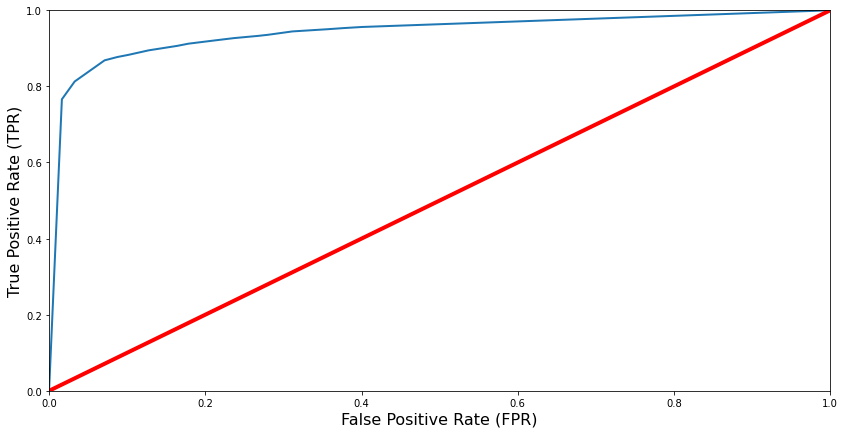

In [ ]:
#ROCplot for Decision Tree
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
y_scoresDT = decision_tree.predict_proba(X_train)
y_scoresDT = y_scoresDT[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scoresDT)# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [ ]:
#ROC for Decision Tree
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scoresDT)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9416003579075194


In [ ]:
#Create dataframe for the output
Y_prediction=decision_tree.predict(X_test)
prediction=pd.DataFrame(np.c_[test_df['PassengerId'],Y_prediction],columns=["PassengerId","Survived"])
prediction

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
#Create the result to csv
prediction.to_csv("Survived_pridiction__decision tree.csv", index=False)

In [ ]:
#Source : Niklas Donges Published in Towards Data Science give me insight on doing data exploration and data preprocessing
#https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
#Source :ChatGPT on giving me insight for hyperparameter tuning